In [1]:
from client import start_client
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from matplotlib.pyplot import figure
from main_func import main,real_partial
from plotting import plot, plot_workers, plot_speedup
from jupyterthemes import jtplot

client,w=start_client(33)
client

<Client: 'tcp://127.0.0.1:42628' processes=33 threads=33, memory=33.69 GB>


Client Scheduler: tcp://127.0.0.1:42628 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 33 Cores: 33 Memory: 33.69 GB


In [17]:
# df_coord= pd.DataFrame(columns=['n_workers','rounds','subrounds', 'start_time', 'wait_time', 
#                           'process_time_sub','process_time_round'])
# df_coord.to_csv('data.csv',index=False)

df_coord=pd.read_csv('data.csv')

# df = df.drop(df.index[0])
# df = df.sort_values(by=['n_workers'])
# df = df.drop(df.index[3])
# df.to_csv('data.csv',index=False)
# fig, ax = plt.subplots(figsize=(8,6))
# df = df.groupby(['n_workers']).mean().plot(kind='line', ax=ax)
# ax.set_ylim(-1,2)
# ax.set_ylabel('Time (sec)')
# ax.set_xlabel('Workers')
# ax.set_title("Time needed for different stages of coordinator\n regarding the number of workers")
# plt.savefig('B_'+"Plots/Times_try2")
df_coord = df_coord.groupby(['n_workers']).mean()
df_coord= df_coord.reset_index()
df_coord

,n_workers,rounds,subrounds,start_time,wait_time,process_time_sub,process_time_round
0,2.0,2.666667,2.666667,0.015435,0.927970,0.012249,0.007840
1,4.0,4.333333,5.333333,0.017526,0.636155,0.031705,0.019114
2,8.0,7.000000,7.000000,0.024061,0.603139,0.062015,0.051826
3,12.0,6.666667,6.666667,0.037177,0.525471,0.073589,0.056967
4,16.0,7.000000,7.000000,0.043295,0.549118,0.095496,0.078346
5,20.0,3.666667,3.666667,0.039200,0.391313,0.048084,0.051239
6,24.0,4.000000,4.333333,0.044418,0.415802,0.097647,0.067016
7,28.0,3.000000,3.000000,0.050751,0.346518,0.069036,0.059001
8,32.0,3.333333,3.333333,0.051791,0.346765,0.122288,0.051533


In [28]:
# df_worker= pd.DataFrame(columns=['n_workers','start_time','wait_time','train_time'])
# df_worker.to_csv('data_workers.csv',index=False)

df_worker=pd.read_csv('data_workers.csv')
# df_worker = df_worker.groupby(['n_workers']).mean()
# df_worker= df_worker.reset_index()
df_worker

,n_workers,start_time,wait_time,train_time
0,4.0,0.003129,0.166135,0.414437
1,4.0,0.003217,0.167011,0.429850
2,4.0,0.003747,0.167049,0.452577
3,4.0,0.002646,0.175532,0.398559
4,4.0,0.002147,0.173071,0.414074
...,...,...,...,...
120,32.0,0.001235,0.310874,0.097907
121,32.0,0.001418,0.302116,0.131891
122,32.0,0.001954,0.307267,0.135772
123,32.0,0.001910,0.302376,0.152780


In [4]:
df_coord.to_csv('data.csv',index=False)
df_worker.to_csv('data_workers.csv',index=False)

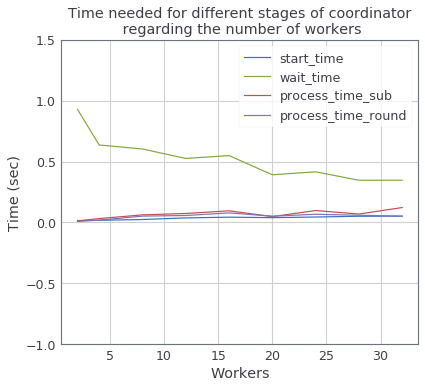

In [32]:
jtplot.style(theme='grade3')
ax = plt.gca()

df_coord.plot(kind='line',x='n_workers',y='start_time',ax=ax)
df_coord.plot(kind='line',x='n_workers',y='wait_time', ax=ax)
df_coord.plot(kind='line',x='n_workers',y='process_time_sub', ax=ax)
df_coord.plot(kind='line',x='n_workers',y='process_time_round', ax=ax)
ax.set_ylim(-1,1.5)
ax.set_ylabel('Time (sec)')
ax.set_xlabel('Workers')
ax.set_title("Time needed for different stages of coordinator\n regarding the number of workers")

plt.show()


### Main function
- make_classification parameters: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html?highlight=make_classification#sklearn.datasets.make_classification
- choose e, and chunk size
- run multiple times to produce plots


### Initialize
***

In [6]:
jtplot.style(theme='grade3') #light plot theme

batches=30000 #number of minibatches
batch_size=1 #size of each minibatch
e=0.8 #tolerance for φ(χ)

#compute samples size
training_s=batches*batch_size
n_samples=int(3*training_s/2) # 1/3 of the samples will be used for testing

#parameters for make classification
dataset_params={
    "n_samples":n_samples,
    "n_features":1000,
    "n_informative":10,
    "n_redundant":0,
    "n_repeated":0,
    "n_classes":2,
    "n_clusters_per_class":1,
    "flip_y":0.2,
    "weights":[0.7,0.3],
    "random_state":17
}
threshold=0.03

chunks=100
e_array=[0.01,0.1,0.3,0.8]
e=0.3
sizes=[30000,50000,100000,150000,200000,300000]
minibatches=[10,50,100]
new="no" #choose if you want to recreate the dataset

### Dataset with no noise flip_y=0
***
#### Balanced
- weights=[0.5,0,5]

In [7]:
# 3 different e
new="no"
dataset_params["weights"]=[0.5,0.5]
Acc_threshold=[]
Rounds_threshold=[]
Time_threshold=[]
total_time_list=[]
total_acc_list=[]
labels=[[]]

for i in range(3):
    Acc,time_l,total_rounds,total_time,total_acc=main(client,w,new,dataset_params,e,chunks,minibatches[0])
    new="no"
    total_time_list.append(total_time)
    total_acc_list.append(total_acc)
    Acc_threshold.append(Acc)
    Rounds_threshold.append(total_rounds)
    Time_threshold.append(time_l)
    time.sleep(2)

-------------------------------------------------------------

Start with num of chunks: 100 ,e: 0.3
Minibatch size: 30.0
Number of chunks for each worker:  3
In progress...
[1, 32, 0.23279523849487305]
Accuracy: 84.460000
[2, 32, 0.45438694953918457]
Accuracy: 85.053333
[3, 3, 0.5363039970397949]
Accuracy: 75.480000
[4, 0, 0.675433874130249]
Accuracy: 70.846667

**
 Pass 0 completed
**

Total time [0.675433874130249]
-------------------------------------------------------------

Start with num of chunks: 100 ,e: 0.3
Minibatch size: 30.0
Number of chunks for each worker:  3
In progress...
[1, 32, 0.1840043067932129]
Accuracy: 84.213333
[2, 29, 0.388765811920166]
Accuracy: 84.673333
[3, 0, 0.5004549026489258]
Accuracy: 76.780000

**
 Pass 0 completed
**

Total time [0.5004549026489258]
-------------------------------------------------------------

Start with num of chunks: 100 ,e: 0.3
Minibatch size: 30.0
Number of chunks for each worker:  3
In progress...
[1, 32, 0.17602849006652832]
A

In [8]:
total_time_mean=[sum(suby) / len(suby) for suby in zip(*total_time_list)] 
total_acc_mean=[sum(suby) / len(suby) for suby in zip(*total_acc_list)] 
name1="np_arrays/total/total_time"+str(len(w)-1)
name2="np_arrays/total/total_acc"+str(len(w)-1)
name3="np_arrays/total/total_time_mean"+str(len(w)-1)
name4="np_arrays/total/total_acc_mean"+str(len(w)-1)
np.save(name1,total_time_list)
np.save(name2,total_acc_list)
np.save(name3,total_time_mean)
np.save(name4,total_acc_mean)


In [9]:
# centr=client.submit(real_partial,minibatches[1],workers=w[0])
# time_centr,Acc_real1,f_acc=centr.result()
# t_list,time_centr,Acc_real1,f_acc=real_partial(10)
# len_real1=np.array([i for i in range(len(Acc_real1))])
# labels='centralized'
# np.save('np_arrays/time_centr',time_centr)
# np.save('np_arrays/Acc_real1',Acc_real1)
# np.save('np_arrays/f_acc',f_acc)

In [10]:
# time_centr=np.load('np_arrays/time_centr.npy')
# f_acc=np.load('np_arrays/f_acc.npy')
# plot_workers([4,8,12,16,20,24,28,32],time_centr,f_acc)
# plot_speedup([4,8,12,16,20,24,28,32],time_centr,f_acc)

In [11]:
# name="Plots/test2.png"
# plot(t_list,Acc_real1,Acc_threshold,Rounds_threshold,Time_threshold,e_array,'centralized',name,'threshold')

In [12]:
# from IPython.display import Audio, display
# display(Audio(url='http://peal.io/download/5e289.wav', autoplay=True))
# http://peal.io/download/mr5xx.wav

In [13]:
# Acc_minibatch=[]
# Rounds_minibatch=[]
# Time_minibatch=[]
# e=0.2
# for i in minibatches :
#     minibatch=i
#     Acc,n_rounds,time_stamps=main(client,w,new,dataset_params,e,chunks,minibatch)
#     new="no"
#     Acc_minibatch.append(Acc)
#     Rounds_minibatch.append(n_rounds)
#     Time_minibatch.append(time_stamps)
#     time.sleep(5)

In [14]:
# name="Plots/Minibatch_4x_w_"+str(len(w))+"_samples_"+str(dataset_params["n_samples"])+"_features_"+str(dataset_params["n_features"])+"_minib_"+str(minibatches)+".png"
# plot(l1,l2,Acc_minibatch,Rounds_minibatch,Time_minibatch,minibatches,labels,name,'minibatches')

### Save results

In [15]:
# f = open("result.txt", "a")
# f.writelines(["\n\n==========================================================================="])
# f.writelines(["\nNEW EXPERIMENT:\nparams:",str(dataset_params),"\nminibaches_size:"
#               ,str(minibatches),"\ndifferent e's:",str(e_array),"\nn_workers: ",str(len(w))])
# f.writelines(["\n___________________________________________________________________________"])
# f.writelines(["\nRESULTS:\nAcc_threshold",str(Acc_threshold),"\nRounds_threshold",str(Rounds_threshold),
#              "\nTime_threshold",str(Time_threshold),"\nlen_real1",str(len_real1),"\nAcc_real1",str(Acc_real1)])
# f.close()

### Shutdown client

In [16]:
client.close()
client.shutdown()